# Parte 3 - Word Vectors

### Importando os dados

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk 
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import gensim

Como já limpamos o texto anteriormente, aqui irei apenas importar o arquivo com os pré-processamentos feitos na primeira parte:

In [8]:
#Importando os dados
df = pd.read_csv('clean-imdb-reviews.csv', index_col=0)

In [9]:
df.head()

,review,sentiment,clean_text
0,One of the other reviewers has mentioned that ...,1,one reviewers mention watch oz episode hook ri...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


### Bigramas

Preparando o input:

In [10]:
sent = [row.split() for row in df.clean_text] #transforma em uma lista de listas

In [12]:
from gensim.models.phrases import Phrases, Phraser

phrases = Phrases(sent, min_count=2, threshold=30, progress_per=10000)
bigram = Phraser(phrases)

INFO - 12:34:34: collecting all words and their counts
INFO - 12:34:34: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 12:34:37: PROGRESS: at sentence #10000, processed 1182018 words and 811621 word types
INFO - 12:34:40: PROGRESS: at sentence #20000, processed 2364665 words and 1427613 word types
INFO - 12:34:43: PROGRESS: at sentence #30000, processed 3546171 words and 1975650 word types
INFO - 12:34:46: PROGRESS: at sentence #40000, processed 4726745 words and 2479308 word types
INFO - 12:34:50: collected 2950798 word types from a corpus of 5912344 words (unigram + bigrams) and 50000 sentences
INFO - 12:34:50: using 2950798 counts as vocab in Phrases<0 vocab, min_count=2, threshold=30, max_vocab_size=40000000>
INFO - 12:34:50: source_vocab length 2950798
INFO - 12:35:31: Phraser built with 37162 phrasegrams


In [14]:
#exemplo
print(bigram["new york is awesome".split()])

['new_york', 'is', 'awesome']


Como podemos ver, o modelo conseguiu captar o bigrama "New York"

In [13]:
sentences = bigram[sent]

## Treinando o modelo

In [14]:
import multiprocessing
from gensim.models import Word2Vec

In [15]:
cores = multiprocessing.cpu_count()

In [39]:
#Iniciando o word2vec
w2v = Word2Vec(min_count=20, 
               window=2, 
               size=300,  
               sample=6e-5, 
               alpha=0.03, 
               min_alpha=0.0007, 
               negative=20,
               workers=cores-1)

In [40]:
#construido a tabela do vocabulário
w2v.build_vocab(sentences, progress_per=10000)

INFO - 19:48:45: collecting all words and their counts
INFO - 19:48:45: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 19:48:50: PROGRESS: at sentence #10000, processed 1096281 words, keeping 69300 word types
INFO - 19:48:56: PROGRESS: at sentence #20000, processed 2193186 words, keeping 93573 word types
INFO - 19:49:02: PROGRESS: at sentence #30000, processed 3288503 words, keeping 109400 word types
INFO - 19:49:08: PROGRESS: at sentence #40000, processed 4382918 words, keeping 121295 word types
INFO - 19:49:13: collected 131123 word types from a corpus of 5483050 raw words and 50000 sentences
INFO - 19:49:13: Loading a fresh vocabulary
INFO - 19:49:13: effective_min_count=20 retains 18921 unique words (14% of original 131123, drops 112202)
INFO - 19:49:13: effective_min_count=20 leaves 5030473 word corpus (91% of original 5483050, drops 452577)
INFO - 19:49:13: deleting the raw counts dictionary of 131123 items
INFO - 19:49:13: sample=6e-05 downsamples 975 m

In [41]:
#Treinando o modelo
w2v.train(sentences, total_examples=w2v.corpus_count, epochs=20, report_delay=1)

INFO - 19:49:14: training model with 3 workers on 18921 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 19:49:15: EPOCH 1 - PROGRESS: at 3.14% examples, 82303 words/s, in_qsize 0, out_qsize 0
INFO - 19:49:16: EPOCH 1 - PROGRESS: at 6.35% examples, 85825 words/s, in_qsize 0, out_qsize 0
INFO - 19:49:17: EPOCH 1 - PROGRESS: at 9.75% examples, 88853 words/s, in_qsize 0, out_qsize 0
INFO - 19:49:18: EPOCH 1 - PROGRESS: at 12.92% examples, 89194 words/s, in_qsize 0, out_qsize 0
INFO - 19:49:19: EPOCH 1 - PROGRESS: at 16.39% examples, 90901 words/s, in_qsize 0, out_qsize 0
INFO - 19:49:20: EPOCH 1 - PROGRESS: at 20.22% examples, 93304 words/s, in_qsize 0, out_qsize 0
INFO - 19:49:21: EPOCH 1 - PROGRESS: at 23.90% examples, 95357 words/s, in_qsize 0, out_qsize 0
INFO - 19:49:22: EPOCH 1 - PROGRESS: at 27.92% examples, 97234 words/s, in_qsize 0, out_qsize 0
INFO - 19:49:23: EPOCH 1 - PROGRESS: at 31.95% examples, 98919 words/s, in_qsize 0, out_qsize 0
INFO

INFO - 19:50:35: EPOCH 3 - PROGRESS: at 49.10% examples, 75159 words/s, in_qsize 0, out_qsize 0
INFO - 19:50:36: EPOCH 3 - PROGRESS: at 51.60% examples, 75033 words/s, in_qsize 0, out_qsize 0
INFO - 19:50:37: EPOCH 3 - PROGRESS: at 54.77% examples, 75493 words/s, in_qsize 0, out_qsize 0
INFO - 19:50:38: EPOCH 3 - PROGRESS: at 57.49% examples, 75559 words/s, in_qsize 0, out_qsize 0
INFO - 19:50:39: EPOCH 3 - PROGRESS: at 60.89% examples, 76392 words/s, in_qsize 0, out_qsize 0
INFO - 19:50:40: EPOCH 3 - PROGRESS: at 64.08% examples, 77047 words/s, in_qsize 0, out_qsize 0
INFO - 19:50:41: EPOCH 3 - PROGRESS: at 67.04% examples, 77195 words/s, in_qsize 0, out_qsize 0
INFO - 19:50:43: EPOCH 3 - PROGRESS: at 69.55% examples, 76846 words/s, in_qsize 0, out_qsize 0
INFO - 19:50:44: EPOCH 3 - PROGRESS: at 72.64% examples, 77210 words/s, in_qsize 0, out_qsize 0
INFO - 19:50:45: EPOCH 3 - PROGRESS: at 75.91% examples, 77696 words/s, in_qsize 0, out_qsize 0
INFO - 19:50:46: EPOCH 3 - PROGRESS: at 

INFO - 19:51:58: EPOCH 5 - PROGRESS: at 86.88% examples, 96500 words/s, in_qsize 0, out_qsize 0
INFO - 19:51:59: EPOCH 5 - PROGRESS: at 90.84% examples, 97065 words/s, in_qsize 0, out_qsize 0
INFO - 19:52:00: EPOCH 5 - PROGRESS: at 95.01% examples, 97722 words/s, in_qsize 0, out_qsize 0
INFO - 19:52:01: EPOCH 5 - PROGRESS: at 99.24% examples, 98301 words/s, in_qsize 0, out_qsize 0
INFO - 19:52:01: worker thread finished; awaiting finish of 2 more threads
INFO - 19:52:01: worker thread finished; awaiting finish of 1 more threads
INFO - 19:52:01: worker thread finished; awaiting finish of 0 more threads
INFO - 19:52:01: EPOCH - 5 : training on 5483050 raw words (2849483 effective words) took 28.9s, 98448 effective words/s
INFO - 19:52:02: EPOCH 6 - PROGRESS: at 3.88% examples, 106486 words/s, in_qsize 0, out_qsize 0
INFO - 19:52:03: EPOCH 6 - PROGRESS: at 8.00% examples, 109980 words/s, in_qsize 1, out_qsize 0
INFO - 19:52:04: EPOCH 6 - PROGRESS: at 11.79% examples, 110602 words/s, in_qs

INFO - 19:53:16: EPOCH 8 - PROGRESS: at 68.18% examples, 99402 words/s, in_qsize 0, out_qsize 0
INFO - 19:53:17: EPOCH 8 - PROGRESS: at 71.72% examples, 99459 words/s, in_qsize 0, out_qsize 0
INFO - 19:53:18: EPOCH 8 - PROGRESS: at 75.20% examples, 99196 words/s, in_qsize 0, out_qsize 0
INFO - 19:53:19: EPOCH 8 - PROGRESS: at 78.65% examples, 99089 words/s, in_qsize 0, out_qsize 0
INFO - 19:53:20: EPOCH 8 - PROGRESS: at 82.13% examples, 98897 words/s, in_qsize 0, out_qsize 0
INFO - 19:53:21: EPOCH 8 - PROGRESS: at 85.53% examples, 98795 words/s, in_qsize 0, out_qsize 0
INFO - 19:53:22: EPOCH 8 - PROGRESS: at 89.03% examples, 98792 words/s, in_qsize 0, out_qsize 0
INFO - 19:53:23: EPOCH 8 - PROGRESS: at 92.48% examples, 98529 words/s, in_qsize 0, out_qsize 0
INFO - 19:53:25: EPOCH 8 - PROGRESS: at 96.29% examples, 98697 words/s, in_qsize 0, out_qsize 0
INFO - 19:53:26: EPOCH 8 - PROGRESS: at 99.79% examples, 98542 words/s, in_qsize 2, out_qsize 1
INFO - 19:53:26: worker thread finished;

INFO - 19:54:34: EPOCH 11 - PROGRESS: at 36.32% examples, 100456 words/s, in_qsize 0, out_qsize 0
INFO - 19:54:35: EPOCH 11 - PROGRESS: at 39.95% examples, 100608 words/s, in_qsize 0, out_qsize 0
INFO - 19:54:36: EPOCH 11 - PROGRESS: at 43.68% examples, 100713 words/s, in_qsize 0, out_qsize 0
INFO - 19:54:37: EPOCH 11 - PROGRESS: at 47.27% examples, 100875 words/s, in_qsize 0, out_qsize 0
INFO - 19:54:38: EPOCH 11 - PROGRESS: at 50.92% examples, 100813 words/s, in_qsize 0, out_qsize 0
INFO - 19:54:39: EPOCH 11 - PROGRESS: at 54.77% examples, 101042 words/s, in_qsize 0, out_qsize 0
INFO - 19:54:40: EPOCH 11 - PROGRESS: at 58.46% examples, 101111 words/s, in_qsize 0, out_qsize 0
INFO - 19:54:42: EPOCH 11 - PROGRESS: at 61.97% examples, 101037 words/s, in_qsize 0, out_qsize 0
INFO - 19:54:43: EPOCH 11 - PROGRESS: at 65.52% examples, 101066 words/s, in_qsize 0, out_qsize 0
INFO - 19:54:44: EPOCH 11 - PROGRESS: at 69.36% examples, 101047 words/s, in_qsize 0, out_qsize 0
INFO - 19:54:45: EPO

INFO - 19:55:51: EPOCH 14 - PROGRESS: at 3.51% examples, 95768 words/s, in_qsize 0, out_qsize 0
INFO - 19:55:52: EPOCH 14 - PROGRESS: at 6.88% examples, 96795 words/s, in_qsize 0, out_qsize 0
INFO - 19:55:53: EPOCH 14 - PROGRESS: at 10.47% examples, 97995 words/s, in_qsize 0, out_qsize 0
INFO - 19:55:54: EPOCH 14 - PROGRESS: at 13.82% examples, 96977 words/s, in_qsize 0, out_qsize 0
INFO - 19:55:55: EPOCH 14 - PROGRESS: at 17.47% examples, 97796 words/s, in_qsize 0, out_qsize 0
INFO - 19:55:56: EPOCH 14 - PROGRESS: at 20.72% examples, 96814 words/s, in_qsize 0, out_qsize 0
INFO - 19:55:57: EPOCH 14 - PROGRESS: at 24.31% examples, 97201 words/s, in_qsize 0, out_qsize 0
INFO - 19:55:58: EPOCH 14 - PROGRESS: at 27.74% examples, 97159 words/s, in_qsize 0, out_qsize 0
INFO - 19:55:59: EPOCH 14 - PROGRESS: at 31.40% examples, 97382 words/s, in_qsize 0, out_qsize 0
INFO - 19:56:00: EPOCH 14 - PROGRESS: at 34.86% examples, 97377 words/s, in_qsize 0, out_qsize 0
INFO - 19:56:01: EPOCH 14 - PROG

INFO - 19:57:13: EPOCH 16 - PROGRESS: at 79.41% examples, 100080 words/s, in_qsize 0, out_qsize 0
INFO - 19:57:14: EPOCH 16 - PROGRESS: at 83.08% examples, 100160 words/s, in_qsize 0, out_qsize 0
INFO - 19:57:15: EPOCH 16 - PROGRESS: at 86.53% examples, 100263 words/s, in_qsize 0, out_qsize 0
INFO - 19:57:16: EPOCH 16 - PROGRESS: at 90.10% examples, 100208 words/s, in_qsize 0, out_qsize 0
INFO - 19:57:17: EPOCH 16 - PROGRESS: at 93.91% examples, 100294 words/s, in_qsize 0, out_qsize 0
INFO - 19:57:18: EPOCH 16 - PROGRESS: at 97.59% examples, 100340 words/s, in_qsize 0, out_qsize 0
INFO - 19:57:18: worker thread finished; awaiting finish of 2 more threads
INFO - 19:57:18: worker thread finished; awaiting finish of 1 more threads
INFO - 19:57:18: worker thread finished; awaiting finish of 0 more threads
INFO - 19:57:18: EPOCH - 16 : training on 5483050 raw words (2850259 effective words) took 28.3s, 100593 effective words/s
INFO - 19:57:19: EPOCH 17 - PROGRESS: at 3.69% examples, 98105 w

INFO - 19:58:30: EPOCH 19 - PROGRESS: at 55.49% examples, 102095 words/s, in_qsize 0, out_qsize 0
INFO - 19:58:31: EPOCH 19 - PROGRESS: at 59.67% examples, 102921 words/s, in_qsize 0, out_qsize 0
INFO - 19:58:32: EPOCH 19 - PROGRESS: at 63.73% examples, 103732 words/s, in_qsize 0, out_qsize 0
INFO - 19:58:33: EPOCH 19 - PROGRESS: at 68.01% examples, 104542 words/s, in_qsize 0, out_qsize 0
INFO - 19:58:34: EPOCH 19 - PROGRESS: at 72.28% examples, 105319 words/s, in_qsize 0, out_qsize 0
INFO - 19:58:35: EPOCH 19 - PROGRESS: at 76.67% examples, 106052 words/s, in_qsize 1, out_qsize 0
INFO - 19:58:37: EPOCH 19 - PROGRESS: at 81.05% examples, 106701 words/s, in_qsize 0, out_qsize 0
INFO - 19:58:38: EPOCH 19 - PROGRESS: at 85.34% examples, 107041 words/s, in_qsize 1, out_qsize 0
INFO - 19:58:39: EPOCH 19 - PROGRESS: at 89.55% examples, 107590 words/s, in_qsize 0, out_qsize 0
INFO - 19:58:40: EPOCH 19 - PROGRESS: at 93.91% examples, 108107 words/s, in_qsize 0, out_qsize 0
INFO - 19:58:41: EPO

(57020297, 109661000)

## Explorando o modelo
Essa parte do projeto é bem livre e pode ser executada de várias maneiras diferentes. A ideia aqui é tentar ver se o modelo consegue captar padrões interessantes com os word vectors que treinamos. Como estamos tratando de um dataset de filmes, achei que seria interessante observar elementos próprios desse universo, como atores, filmes e premiações:

In [42]:
#procurando o vetor mais similar a "mel_gibson"
w2v.wv.most_similar(positive=['mel_gibson'])

INFO - 19:59:28: precomputing L2-norms of word weight vectors


[('passion_christ', 0.6401146054267883),
 ('lethal_weapon', 0.5837762951850891),
 ('braveheart', 0.5815775394439697),
 ('tom_cruise', 0.5247739553451538),
 ('patriot', 0.5132507085800171),
 ('jean_claude', 0.49345862865448),
 ('total_recall', 0.4886854887008667),
 ('kevin_costner', 0.4653433561325073),
 ('harvey_keitel', 0.4617229700088501),
 ('harrison_ford', 0.4615775942802429)]

Segundo o nosso modelo, as três palavras mais próximas de "mel_gibson" são "passion_christ", "braveheart" e "lethal_weapon". Este resultado é coerente, pois os três são filmes em que Mel Gibson dirigiu ou esteve presente como ator, assim, faz sentido que essas palavras apareçam no mesmo contexto. 

In [43]:
w2v.wv.doesnt_match(['tom_cruise', 'brad_pitt', 'natalie_portman', 'leonardo_dicaprio'])

'natalie_portman'

Nessa lista de atores, o nosso modelo identificou que a palavra estranha ao conjunto era a atriz "natalie_portman"

Para computar analogias, iremos utilizar a seguinte função:

In [44]:
def analogy(x1, x2, y1):
    """
    Input: x1, x2, y1
        x1 = palavra 1
        x2 = palavra 2
        y1 = palavra 3
    Output: x1 - x2 + y1
    
    Com isso, estamos calculando a seguinte pergunta: Qual palavra que está para y1, da mesma
    forma que x1 está para x2?
    """
    result = w2v.wv.most_similar(positive = [y1, x2], negative=[x1])
    return result [0][0a

In [45]:
#Exemplo canônico com word2vec:
analogy('man', 'king', 'woman')

'queen'

Nesse exemplo, a palavra "man" está para "king", da mesma forma que "woman" está para "queen"

Agora, vamos procurar algum resultado mais iteressante com o tema do nosso dataset:

In [54]:
analogy('movie', 'academy_awards', 'tv')

'emmy'

Assim como o Oscar ("academy_awards") premia o cinema, o prêmio equivalente para a televisão é o Emmy. Tudo isso foi bem capturado pelo nosso modelo. 

## *Atividade extra*

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [67]:
def tsnescatterplot(model, word, list_names):

    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adiciona o vetor da palavra da query
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gera lista com as palavras mais similares 
    close_words = model.wv.most_similar([word])
    
    # adiciona os vetores para cada uma das palavras mais próximas no array 
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adiciona os vetores para cada uma das palavras em list_names no array 
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduz a dimensionalidade de 300 para 10 dimensões com PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Acha as coordenadas do t-SNE para 2 dimensões 
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Arruma tudo para o plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(20, 15)
    
    # Plot básico
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adiciona anotações uma por uma com um loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


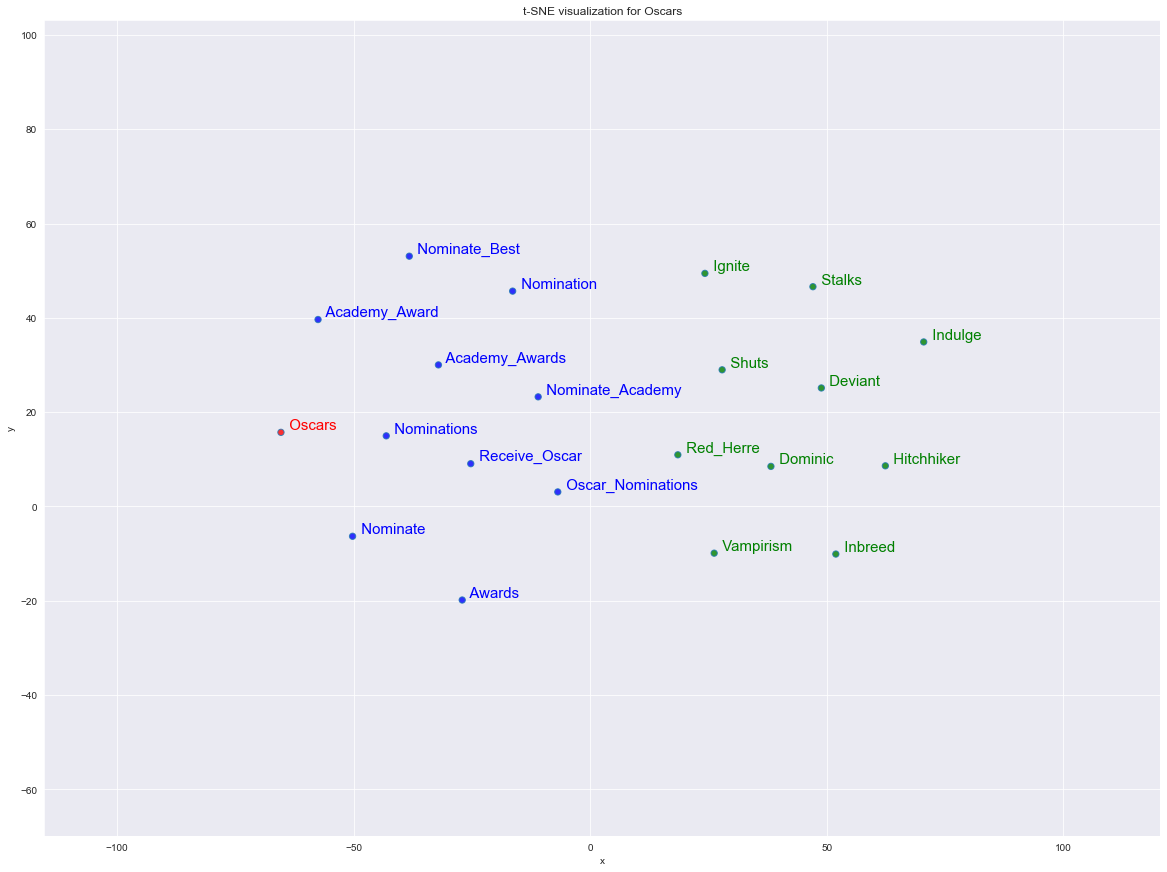

In [73]:
#10 palavras mais similares VS 10 palavras menos similares
tsnescatterplot(w2v, 'oscars', [i[0] for i in w2v.wv.most_similar(negative=["oscars"])])